In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

require(tidyverse)
library(ggrepel)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [4]:
# show all columns in the dataframe

pd.set_option('display.max_columns', None)

In [5]:
df_counts = pd.read_csv('CB-Final_2.csv')

In [6]:
df_counts.head()

,code,name,Tobacco Retail Dealer Cap,Active Tobacco Retail Dealer Licenses,TRD Available Under Cap,Electronic Cigarette Retail Dealer Cap,Active Electronic Cigarette Retail Dealer Licenses,ECD Available Under Cap,total_count,total_count_2019,change,activer per 1000,income,poverty,age_med,population,black_population,asian_population,hispanic_population,occupied_unit,vacant_unit,owner,renter,vacant_occupied_ratio,owner_renter_ratio,black_pct,asian_pct,hispanic_pct,retailers_per_1000,perc_owners,borough,is_midtown
0,3,Brooklyn 16,48,30,18,6,5,1,35,98,0.357143,0.300520,35431,39.1,35.1,99827,72787,2752,23012,37770,3437,5818,31952,0.090998,0.182086,0.729131,0.027568,0.230519,0.350607,15.403760,Brooklyn,False
1,3,Brooklyn 5,94,60,34,15,11,4,71,181,0.392265,0.298763,54431,24.6,40.7,200828,113423,16432,65791,76572,4367,17813,58759,0.057031,0.303154,0.564777,0.081821,0.327599,0.353536,23.263073,Brooklyn,False
2,1,Bronx 9,78,54,24,15,15,0,69,175,0.394286,0.292298,46904,23.7,42.6,184743,79924,3802,105892,62497,2098,3180,59317,0.033570,0.053610,0.432623,0.020580,0.573185,0.373492,5.088244,Bronx,False
3,3,Brooklyn 8,46,33,13,12,12,0,45,109,0.412844,0.307208,78598,20.2,40.5,107419,55666,7260,14470,48645,3762,9343,39302,0.077336,0.237723,0.518214,0.067586,0.134706,0.418920,19.206496,Brooklyn,False
4,2,Manhattan 12,86,60,26,28,25,3,85,199,0.427136,0.296036,59898,20.1,39.6,202678,42601,8567,134835,82694,4337,11304,71390,0.052446,0.158342,0.210191,0.042269,0.665267,0.419384,13.669674,Manhattan,False


In [7]:
df_counts['total_caps'] = df_counts['Tobacco Retail Dealer Cap'] + df_counts['Electronic Cigarette Retail Dealer Cap']
df_counts.head()

,code,name,Tobacco Retail Dealer Cap,Active Tobacco Retail Dealer Licenses,TRD Available Under Cap,Electronic Cigarette Retail Dealer Cap,Active Electronic Cigarette Retail Dealer Licenses,ECD Available Under Cap,total_count,total_count_2019,change,activer per 1000,income,poverty,age_med,population,black_population,asian_population,hispanic_population,occupied_unit,vacant_unit,owner,renter,vacant_occupied_ratio,owner_renter_ratio,black_pct,asian_pct,hispanic_pct,retailers_per_1000,perc_owners,borough,is_midtown,total_caps
0,3,Brooklyn 16,48,30,18,6,5,1,35,98,0.357143,0.300520,35431,39.1,35.1,99827,72787,2752,23012,37770,3437,5818,31952,0.090998,0.182086,0.729131,0.027568,0.230519,0.350607,15.403760,Brooklyn,False,54
1,3,Brooklyn 5,94,60,34,15,11,4,71,181,0.392265,0.298763,54431,24.6,40.7,200828,113423,16432,65791,76572,4367,17813,58759,0.057031,0.303154,0.564777,0.081821,0.327599,0.353536,23.263073,Brooklyn,False,109
2,1,Bronx 9,78,54,24,15,15,0,69,175,0.394286,0.292298,46904,23.7,42.6,184743,79924,3802,105892,62497,2098,3180,59317,0.033570,0.053610,0.432623,0.020580,0.573185,0.373492,5.088244,Bronx,False,93
3,3,Brooklyn 8,46,33,13,12,12,0,45,109,0.412844,0.307208,78598,20.2,40.5,107419,55666,7260,14470,48645,3762,9343,39302,0.077336,0.237723,0.518214,0.067586,0.134706,0.418920,19.206496,Brooklyn,False,58
4,2,Manhattan 12,86,60,26,28,25,3,85,199,0.427136,0.296036,59898,20.1,39.6,202678,42601,8567,134835,82694,4337,11304,71390,0.052446,0.158342,0.210191,0.042269,0.665267,0.419384,13.669674,Manhattan,False,114


`geom_smooth()` using formula = 'y ~ x'

Call:
lm(formula = total_count ~ black_pct, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-75.33 -29.45 -14.68  11.88 290.79 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   140.05      11.81  11.862  < 2e-16 ***
black_pct    -121.77      33.69  -3.614 0.000671 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 56.46 on 53 degrees of freedom
Multiple R-squared:  0.1977,	Adjusted R-squared:  0.1826 
F-statistic: 13.06 on 1 and 53 DF,  p-value: 0.0006708



In addition: Warning message:
ggrepel: 15 unlabeled data points (too many overlaps). Consider increasing max.overlaps 


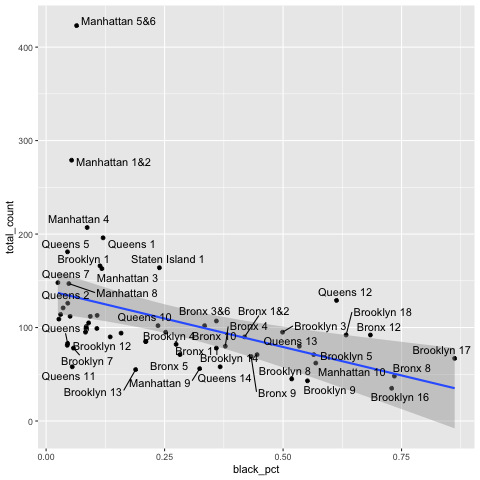

In [8]:
%%R -i df_counts

df <- df_counts

plot <- ggplot(df, aes(x = black_pct, y = total_count)) + geom_point() + geom_smooth(method = 'lm') + geom_text_repel(aes(label = name))
print(plot)

model <- lm(total_count ~ black_pct, data = df)
summary(model)

`geom_smooth()` using formula = 'y ~ x'

Call:
lm(formula = retailers_per_1000 ~ black_pct, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45742 -0.17463 -0.05879  0.07254  1.44444 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.91408    0.06972   13.11  < 2e-16 ***
black_pct   -0.74798    0.19895   -3.76 0.000426 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3334 on 53 degrees of freedom
Multiple R-squared:  0.2105,	Adjusted R-squared:  0.1956 
F-statistic: 14.13 on 1 and 53 DF,  p-value: 0.000426



In addition: Warning message:
ggrepel: 11 unlabeled data points (too many overlaps). Consider increasing max.overlaps 


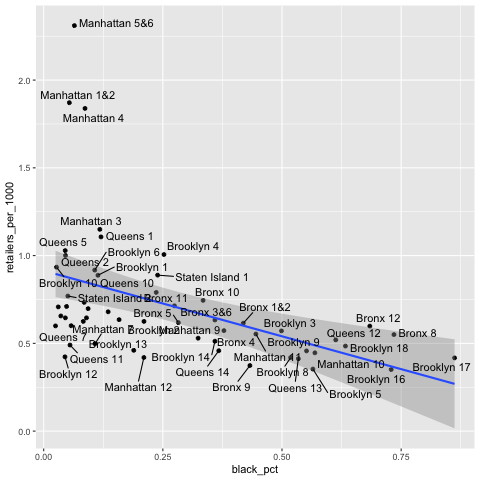

In [9]:
%%R 

plot <- ggplot(df, aes(x = black_pct, y = retailers_per_1000)) + geom_point() + geom_smooth(method = 'lm') + geom_text_repel(aes(label = name))
print(plot)

model <- lm(retailers_per_1000 ~ black_pct, data = df)
summary(model)

`geom_smooth()` using formula = 'y ~ x'

Call:
lm(formula = change ~ black_pct + vacant_occupied_ratio, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.177777 -0.064125 -0.007925  0.060134  0.192485 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.64849    0.03095  20.952  < 2e-16 ***
black_pct             -0.29481    0.05694  -5.178 3.69e-06 ***
vacant_occupied_ratio  0.35072    0.25108   1.397    0.168    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09325 on 52 degrees of freedom
Multiple R-squared:  0.3905,	Adjusted R-squared:  0.3671 
F-statistic: 16.66 on 2 and 52 DF,  p-value: 2.564e-06



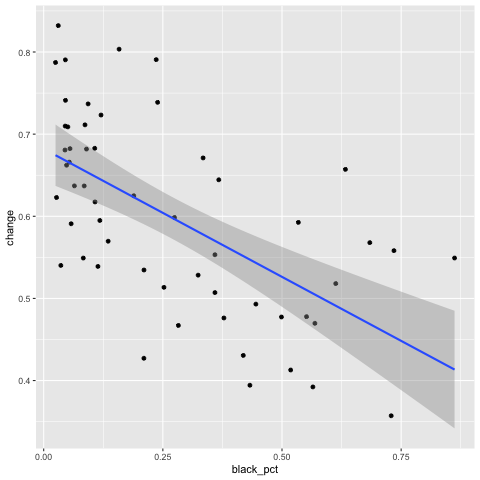

In [10]:
%%R 

plot <- ggplot(df, aes(x = black_pct, y = change)) + geom_point() + geom_smooth(method = 'lm')
print(plot)

model <- lm(change ~ black_pct + vacant_occupied_ratio, data = df)
summary(model)

In [11]:
%%R

model <- lm(change ~ black_pct + total_caps, data = df)
summary(model)


Call:
lm(formula = change ~ black_pct + total_caps, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.185011 -0.080501 -0.005102  0.072906  0.172520 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.7176155  0.0361542  19.849  < 2e-16 ***
black_pct   -0.3299797  0.0580961  -5.680 6.14e-07 ***
total_caps  -0.0003168  0.0002706  -1.171    0.247    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09376 on 52 degrees of freedom
Multiple R-squared:  0.3839,	Adjusted R-squared:  0.3602 
F-statistic:  16.2 on 2 and 52 DF,  p-value: 3.397e-06




Attaching package: ‘flexplot’

The following object is masked from ‘package:ggplot2’:

    flip_data



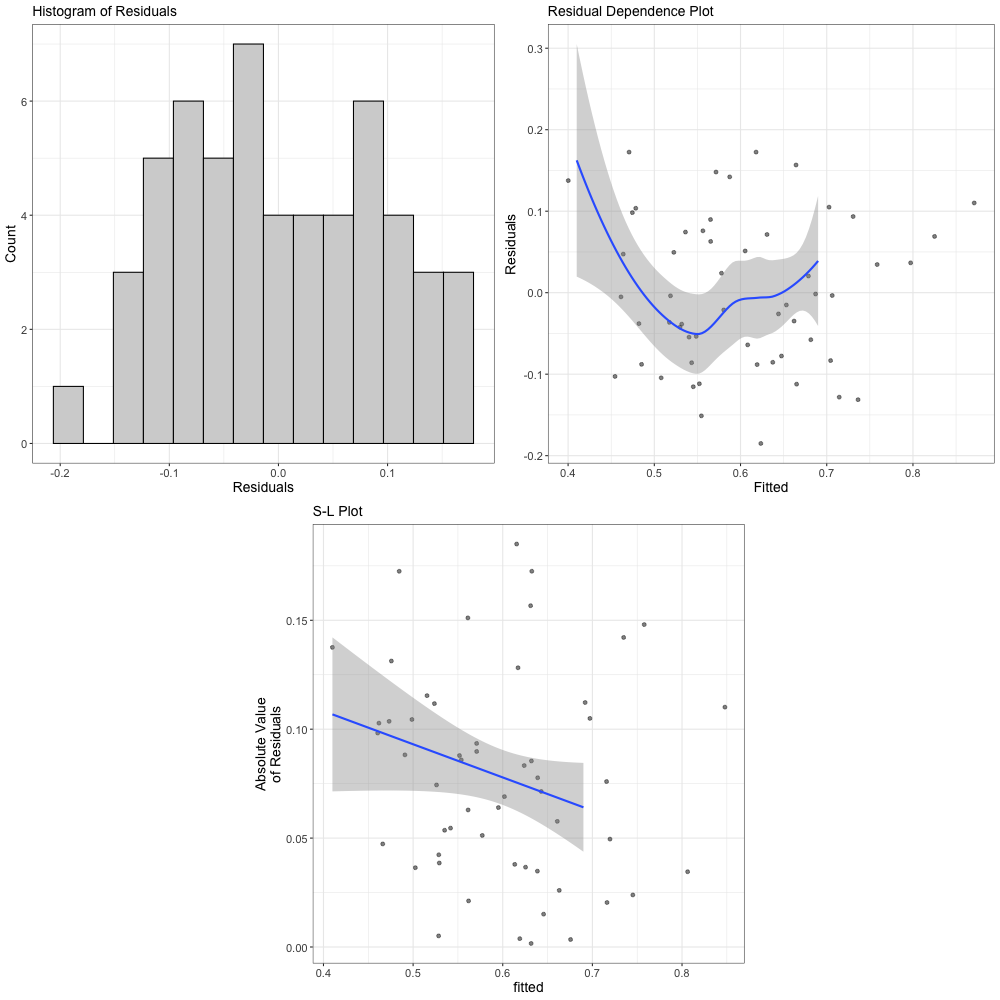

In [12]:
%%R -w 1000 -h 1000

library(flexplot)

visualize(model, plot="residuals")

In [13]:
%%R 

# add residuals and fitted to dataframe

df_fitted <- df %>% mutate(
    fitted = fitted(model),
    residuals = residuals(model)
)

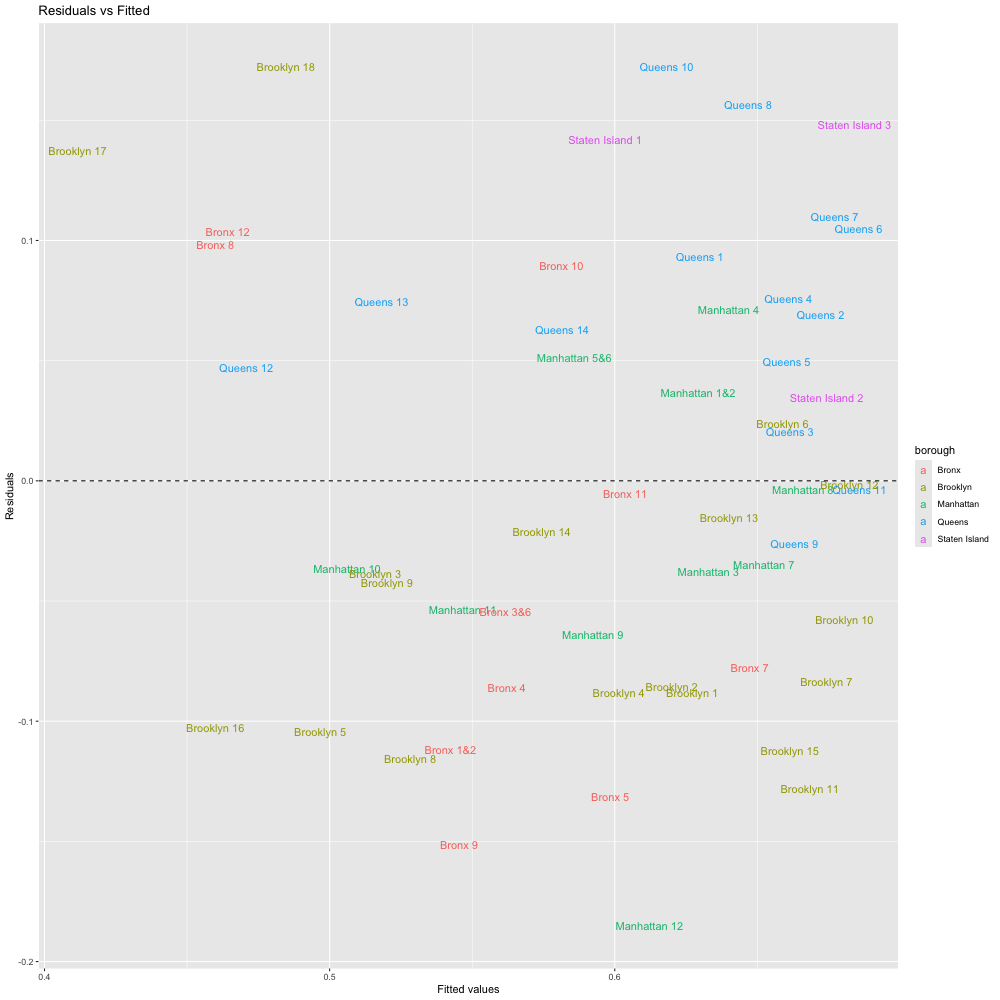

In [14]:
%%R -w 1000 -h 1000


# library(ggrepel)

ggplot(df_fitted) +
    aes(x = fitted, y = residuals, color=borough) + 
    # geom_point() + 
    geom_text(aes(label = name)) +
    geom_hline(yintercept = 0, linetype = 'dashed') +
    labs(
        title = 'Residuals vs Fitted',
        x = 'Fitted values',
        y = 'Residuals'
    )
    # geom_smooth(method = 'lm')

In [15]:
%%R

model <- lm(change ~ black_pct + total_caps + vacant_occupied_ratio + perc_owners, data = df)
summary(model)


Call:
lm(formula = change ~ black_pct + total_caps + vacant_occupied_ratio + 
    perc_owners, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121311 -0.057064  0.002481  0.044456  0.130414 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.5384692  0.0357432  15.065  < 2e-16 ***
black_pct             -0.2420583  0.0428689  -5.646 7.71e-07 ***
total_caps            -0.0004218  0.0002333  -1.808  0.07666 .  
vacant_occupied_ratio  0.6844554  0.2128898   3.215  0.00229 ** 
perc_owners            0.0033272  0.0005111   6.509 3.52e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06628 on 50 degrees of freedom
Multiple R-squared:  0.704,	Adjusted R-squared:  0.6803 
F-statistic: 29.72 on 4 and 50 DF,  p-value: 1.13e-12



In [16]:
df_counts['dir_change'] = df_counts['total_count_2019'] - df_counts['total_count']
df_counts.head()

,code,name,Tobacco Retail Dealer Cap,Active Tobacco Retail Dealer Licenses,TRD Available Under Cap,Electronic Cigarette Retail Dealer Cap,Active Electronic Cigarette Retail Dealer Licenses,ECD Available Under Cap,total_count,total_count_2019,change,activer per 1000,income,poverty,age_med,population,black_population,asian_population,hispanic_population,occupied_unit,vacant_unit,owner,renter,vacant_occupied_ratio,owner_renter_ratio,black_pct,asian_pct,hispanic_pct,retailers_per_1000,perc_owners,borough,is_midtown,total_caps,dir_change
0,3,Brooklyn 16,48,30,18,6,5,1,35,98,0.357143,0.300520,35431,39.1,35.1,99827,72787,2752,23012,37770,3437,5818,31952,0.090998,0.182086,0.729131,0.027568,0.230519,0.350607,15.403760,Brooklyn,False,54,63
1,3,Brooklyn 5,94,60,34,15,11,4,71,181,0.392265,0.298763,54431,24.6,40.7,200828,113423,16432,65791,76572,4367,17813,58759,0.057031,0.303154,0.564777,0.081821,0.327599,0.353536,23.263073,Brooklyn,False,109,110
2,1,Bronx 9,78,54,24,15,15,0,69,175,0.394286,0.292298,46904,23.7,42.6,184743,79924,3802,105892,62497,2098,3180,59317,0.033570,0.053610,0.432623,0.020580,0.573185,0.373492,5.088244,Bronx,False,93,106
3,3,Brooklyn 8,46,33,13,12,12,0,45,109,0.412844,0.307208,78598,20.2,40.5,107419,55666,7260,14470,48645,3762,9343,39302,0.077336,0.237723,0.518214,0.067586,0.134706,0.418920,19.206496,Brooklyn,False,58,64
4,2,Manhattan 12,86,60,26,28,25,3,85,199,0.427136,0.296036,59898,20.1,39.6,202678,42601,8567,134835,82694,4337,11304,71390,0.052446,0.158342,0.210191,0.042269,0.665267,0.419384,13.669674,Manhattan,False,114,114


# All change was positive, which means that there were no increases in tobacco retailers since 2019

In [17]:
df_counts['dir_change'].min()

22

# I used 2019 as the base year

In [18]:
df_counts['perc_dir_change'] = (df_counts['dir_change'] / df_counts['total_count_2019']) * 100
df_counts.head()

,code,name,Tobacco Retail Dealer Cap,Active Tobacco Retail Dealer Licenses,TRD Available Under Cap,Electronic Cigarette Retail Dealer Cap,Active Electronic Cigarette Retail Dealer Licenses,ECD Available Under Cap,total_count,total_count_2019,change,activer per 1000,income,poverty,age_med,population,black_population,asian_population,hispanic_population,occupied_unit,vacant_unit,owner,renter,vacant_occupied_ratio,owner_renter_ratio,black_pct,asian_pct,hispanic_pct,retailers_per_1000,perc_owners,borough,is_midtown,total_caps,dir_change,perc_dir_change
0,3,Brooklyn 16,48,30,18,6,5,1,35,98,0.357143,0.300520,35431,39.1,35.1,99827,72787,2752,23012,37770,3437,5818,31952,0.090998,0.182086,0.729131,0.027568,0.230519,0.350607,15.403760,Brooklyn,False,54,63,64.285714
1,3,Brooklyn 5,94,60,34,15,11,4,71,181,0.392265,0.298763,54431,24.6,40.7,200828,113423,16432,65791,76572,4367,17813,58759,0.057031,0.303154,0.564777,0.081821,0.327599,0.353536,23.263073,Brooklyn,False,109,110,60.773481
2,1,Bronx 9,78,54,24,15,15,0,69,175,0.394286,0.292298,46904,23.7,42.6,184743,79924,3802,105892,62497,2098,3180,59317,0.033570,0.053610,0.432623,0.020580,0.573185,0.373492,5.088244,Bronx,False,93,106,60.571429
3,3,Brooklyn 8,46,33,13,12,12,0,45,109,0.412844,0.307208,78598,20.2,40.5,107419,55666,7260,14470,48645,3762,9343,39302,0.077336,0.237723,0.518214,0.067586,0.134706,0.418920,19.206496,Brooklyn,False,58,64,58.715596
4,2,Manhattan 12,86,60,26,28,25,3,85,199,0.427136,0.296036,59898,20.1,39.6,202678,42601,8567,134835,82694,4337,11304,71390,0.052446,0.158342,0.210191,0.042269,0.665267,0.419384,13.669674,Manhattan,False,114,114,57.286432


`geom_smooth()` using formula = 'y ~ x'


In addition: Warning message:
ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps 


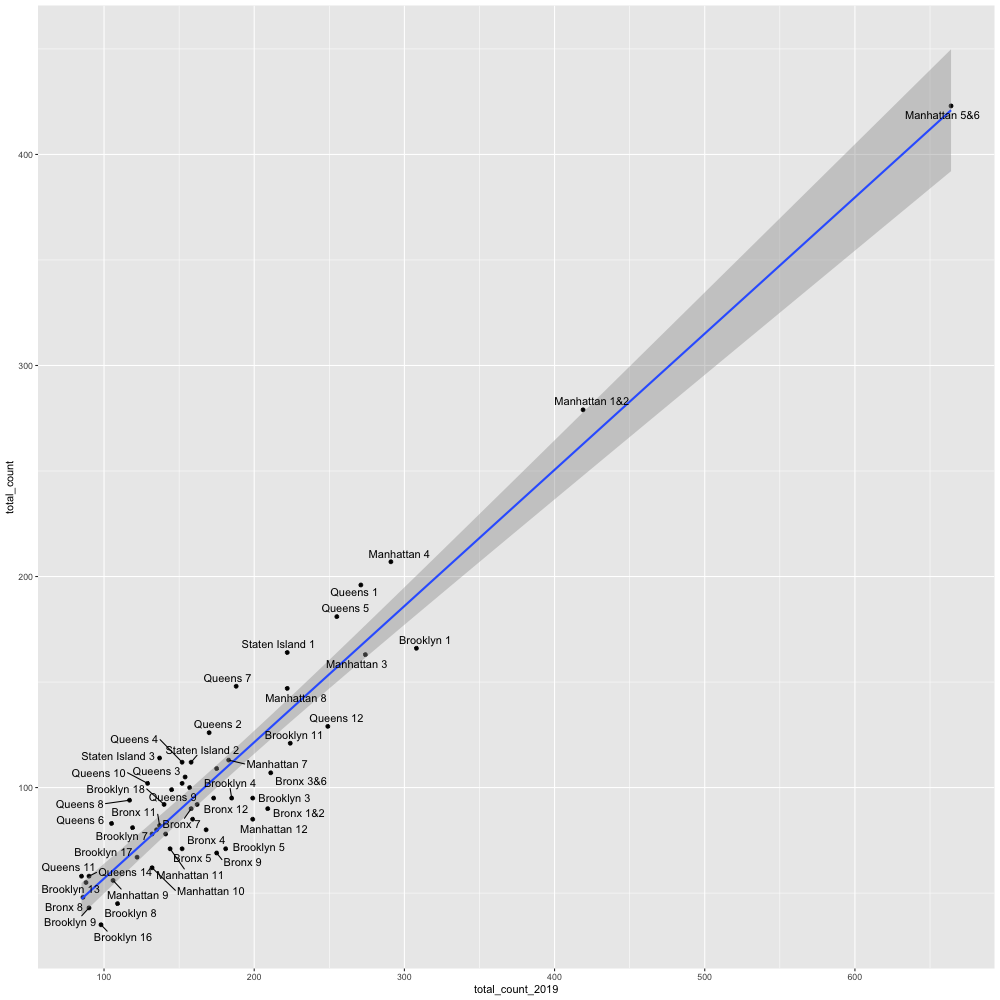

In [19]:
%%R -w 1000 -h 1000

#plot total_count and total_count_2019

plot <- ggplot(df_counts, aes(x = total_count_2019, y = total_count)) + geom_point() + geom_smooth(method = 'lm') + geom_text_repel(aes(label = name))
print(plot)

In [20]:
%%R -i df_counts

df <- df_counts

model <- lm(perc_dir_change ~ black_pct + total_caps + vacant_occupied_ratio + perc_owners, data = df)
summary(model)


Call:
lm(formula = perc_dir_change ~ black_pct + total_caps + vacant_occupied_ratio + 
    perc_owners, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.0414  -4.4456  -0.2481   5.7064  12.1311 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            46.15308    3.57432  12.912  < 2e-16 ***
black_pct              24.20583    4.28689   5.646 7.71e-07 ***
total_caps              0.04218    0.02333   1.808  0.07666 .  
vacant_occupied_ratio -68.44554   21.28898  -3.215  0.00229 ** 
perc_owners            -0.33272    0.05111  -6.509 3.52e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.628 on 50 degrees of freedom
Multiple R-squared:  0.704,	Adjusted R-squared:  0.6803 
F-statistic: 29.72 on 4 and 50 DF,  p-value: 1.13e-12



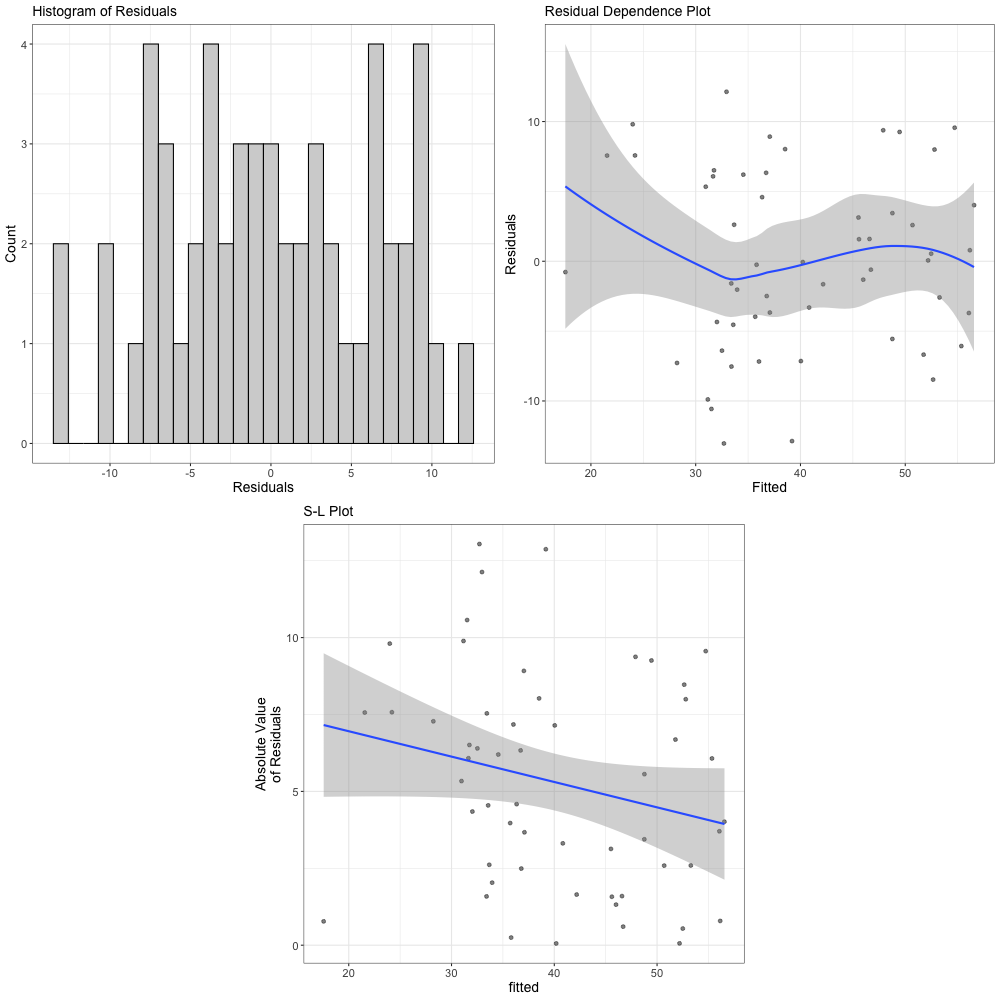

In [21]:
%%R -w 1000 -h 1000

library(flexplot)

visualize(model, plot="residuals")

In [22]:
%%R 

# add residuals and fitted to dataframe

df_fitted <- df %>% mutate(
    fitted = fitted(model),
    residuals = residuals(model)
)

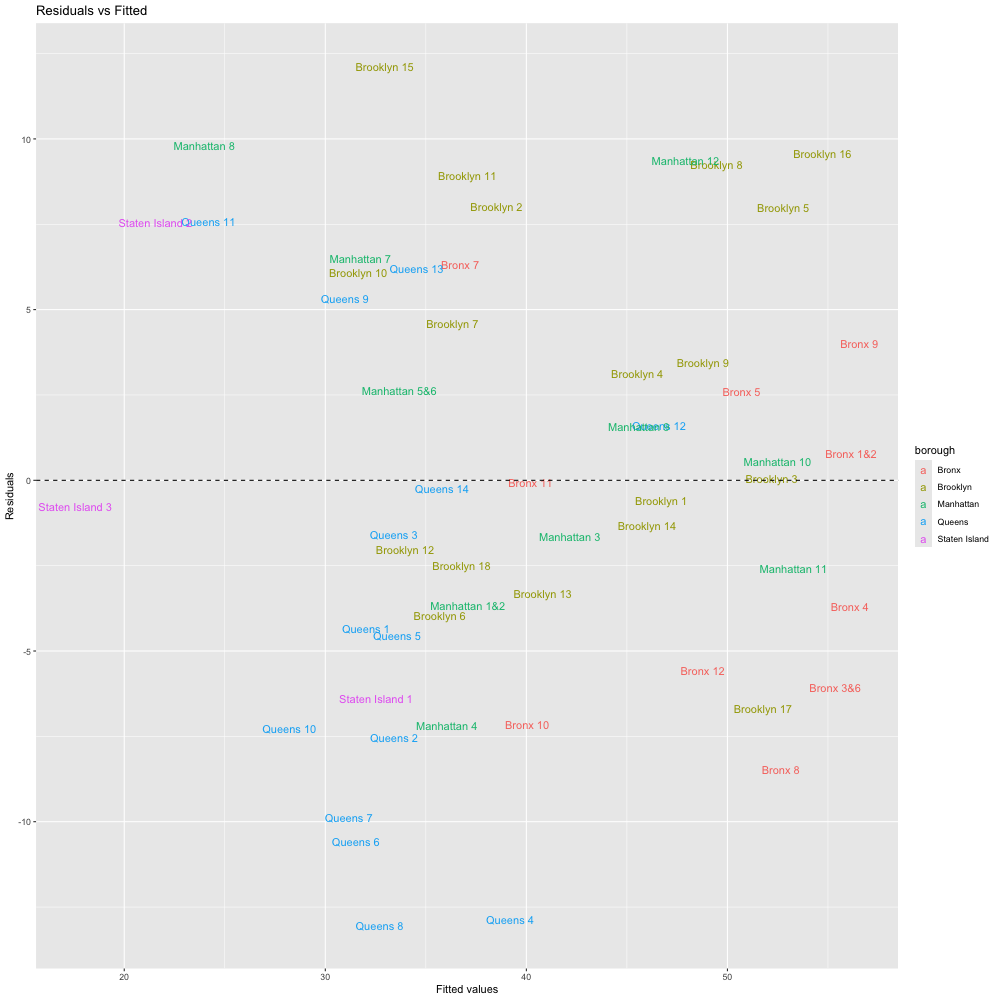

In [23]:
%%R -w 1000 -h 1000


# library(ggrepel)

ggplot(df_fitted) +
    aes(x = fitted, y = residuals, color=borough) + 
    # geom_point() + 
    geom_text(aes(label = name)) +
    geom_hline(yintercept = 0, linetype = 'dashed') +
    labs(
        title = 'Residuals vs Fitted',
        x = 'Fitted values',
        y = 'Residuals'
    )
    # geom_smooth(method = 'lm')

In [24]:
df_counts[['name', 'perc_dir_change']].sort_values('perc_dir_change', ascending=False)

,name,perc_dir_change
0,Brooklyn 16,64.285714
1,Brooklyn 5,60.773481
2,Bronx 9,60.571429
3,Brooklyn 8,58.715596
4,Manhattan 12,57.286432
5,Bronx 1&2,56.937799
6,Bronx 5,53.289474
7,Manhattan 10,53.030303
8,Bronx 4,52.380952
9,Brooklyn 3,52.261307


In [25]:
df_counts['retailers_per_1000'].mean()

0.7137289843014366

In [26]:
df_counts[['name', 'retailers_per_1000']]

,name,retailers_per_1000
0,Brooklyn 16,0.350607
1,Brooklyn 5,0.353536
2,Bronx 9,0.373492
3,Brooklyn 8,0.418920
4,Manhattan 12,0.419384
5,Bronx 1&2,0.614830
6,Bronx 5,0.618316
7,Manhattan 10,0.446194
8,Bronx 4,0.572463
9,Brooklyn 3,0.570982


In [27]:
df_active = pd.read_csv('df_active.csv')
df_active.head()

,Unnamed: 0,DCA License Number,License Type,License Expiration Date,License Status,License Creation Date,Industry,Business Name,Business Name 2,Address Building,Address Street Name,Secondary Address Street Name,Address City,Address State,Address ZIP,Contact Phone Number,Address Borough,Borough Code,Community Board,Council District,BIN,BBL,NTA,Census Tract,Detail,Longitude,Latitude,Location,year,age
0,0,1178405-DCA,Business,12/31/2023,Active,08/27/2004,Tobacco Retail Dealer,OLSEN NEWS CORP.,NaN,NaN,BROADWAY,WEST 40 STREET,NEW YORK,NY,10018,646-258-4324,Manhattan,1.0,105.0,3.0,NaN,NaN,NaN,NaN,NaN,-73.986865,40.754317,"(40.75431708865135, -73.98686541972873)",2004,20
1,1,2016212-1-DCA,Business,12/31/2023,Active,12/05/2014,Tobacco Retail Dealer,ASTORIA CENTER INC,NaN,4402,ASTORIA BLVD,NaN,ASTORIA,NY,11103,347-668-4569,Queens,4.0,401.0,22.0,4012858.0,4.007170e+09,QN70,141.0,NaN,-73.906927,40.768202,"(40.76820158202948, -73.9069268281986)",2014,10
2,2,1217359-DCA,Business,12/31/2023,Active,01/11/2006,Tobacco Retail Dealer,"FLEUR, RONY ST",RON'S DELI GROCERY STORE,17024,JAMAICA AVE,NaN,JAMAICA,NY,11432,7186589156,Queens,4.0,412.0,27.0,4217486.0,4.102120e+09,QN61,444.0,NaN,-73.789284,40.707291,"(40.70729121951161, -73.7892842185725)",2006,18
3,3,1435239-DCA,Business,12/31/2023,Active,06/22/2012,Tobacco Retail Dealer,PRESBYTERIAN 164 DELI CORP.,NaN,1081,SAINT NICHOLAS AVE,NaN,NEW YORK,NY,10032,212-568-3130,Manhattan,1.0,112.0,7.0,1062937.0,1.021220e+09,MN36,245.0,NaN,-73.940020,40.837602,"(40.83760200533997, -73.94001991132355)",2012,12
4,4,2045066-1-DCA,Business,12/31/2023,Active,10/26/2016,Tobacco Retail Dealer,A & M DELI & GRILL INC,NaN,13202,JAMAICA AVE,NaN,RICHMOND HILL,NY,11418,347-635-2975,Queens,4.0,409.0,29.0,4196340.0,4.093400e+09,QN54,14202.0,NaN,-73.820497,40.702110,"(40.70210984823282, -73.82049747055868)",2016,8


In [28]:
df_age = df_active[['Community Board', 'age']]
df_age.head()

,Community Board,age
0,105.0,20
1,401.0,10
2,412.0,18
3,112.0,12
4,409.0,8


In [29]:
df_mean_age = df_age.groupby('Community Board').mean().reset_index()
df_mean_age

,Community Board,age
0,101.0,11.781250
1,102.0,11.505495
2,103.0,9.247619
3,104.0,10.590551
4,105.0,13.252577
5,106.0,11.511905
6,107.0,12.185185
7,108.0,11.196078
8,109.0,10.190476
9,110.0,9.000000


In [30]:
# Create a new column borough. if Community Board is between 100 and 200, then put Manhattan. If between 200 and 300, put Bronx. If between 300 and 400, put Brooklyn. If between 400 and 500, put Queens. If between 500 and 600, put Staten Island.
df_mean_age['borough'] = df_mean_age['Community Board'].apply(lambda x: 'Manhattan' if x < 200 else 'Bronx' if x < 300 else 'Brooklyn' if x < 400 else 'Queens' if x < 500 else 'Staten Island')
df_mean_age

,Community Board,age,borough
0,101.0,11.781250,Manhattan
1,102.0,11.505495,Manhattan
2,103.0,9.247619,Manhattan
3,104.0,10.590551,Manhattan
4,105.0,13.252577,Manhattan
5,106.0,11.511905,Manhattan
6,107.0,12.185185,Manhattan
7,108.0,11.196078,Manhattan
8,109.0,10.190476,Manhattan
9,110.0,9.000000,Manhattan


In [31]:
#remove decimal point from df_mean_age['Community Board']
df_mean_age['Community Board'] = df_mean_age['Community Board'].astype(int)
df_mean_age.head()

,Community Board,age,borough
0,101,11.781250,Manhattan
1,102,11.505495,Manhattan
2,103,9.247619,Manhattan
3,104,10.590551,Manhattan
4,105,13.252577,Manhattan


In [32]:
# create a column 'District' and extract the 2nd and 3rd digit from Community Board
df_mean_age['District'] = df_mean_age['Community Board'].apply(lambda x: int(str(x)[1:3]))

In [33]:
df_mean_age

,Community Board,age,borough,District
0,101,11.781250,Manhattan,1
1,102,11.505495,Manhattan,2
2,103,9.247619,Manhattan,3
3,104,10.590551,Manhattan,4
4,105,13.252577,Manhattan,5
5,106,11.511905,Manhattan,6
6,107,12.185185,Manhattan,7
7,108,11.196078,Manhattan,8
8,109,10.190476,Manhattan,9
9,110,9.000000,Manhattan,10


In [34]:
# create new column CD by concat columns borough and District
df_mean_age['CD'] = df_mean_age['borough'] + ' ' + df_mean_age['District'].astype(str)
df_mean_age.head()

,Community Board,age,borough,District,CD
0,101,11.781250,Manhattan,1,Manhattan 1
1,102,11.505495,Manhattan,2,Manhattan 2
2,103,9.247619,Manhattan,3,Manhattan 3
3,104,10.590551,Manhattan,4,Manhattan 4
4,105,13.252577,Manhattan,5,Manhattan 5


In [35]:
df_counts['name'].unique()

array(['Brooklyn 16', 'Brooklyn 5', 'Bronx 9', 'Brooklyn 8',
       'Manhattan 12', 'Bronx 1&2', 'Bronx 5', 'Manhattan 10', 'Bronx 4',
       'Brooklyn 3', 'Brooklyn 9', 'Manhattan 11', 'Bronx 3&6',
       'Brooklyn 4', 'Queens 12', 'Manhattan 9', 'Brooklyn 2',
       'Brooklyn 1', 'Brooklyn 11', 'Brooklyn 15', 'Brooklyn 17',
       'Brooklyn 14', 'Bronx 8', 'Bronx 12', 'Bronx 7', 'Brooklyn 7',
       'Queens 13', 'Manhattan 3', 'Bronx 11', 'Manhattan 7',
       'Brooklyn 10', 'Brooklyn 13', 'Queens 9', 'Manhattan 5&6',
       'Queens 14', 'Brooklyn 18', 'Manhattan 8', 'Manhattan 1&2',
       'Bronx 10', 'Brooklyn 12', 'Queens 3', 'Queens 11', 'Brooklyn 6',
       'Staten Island 2', 'Queens 5', 'Manhattan 4', 'Queens 1',
       'Queens 4', 'Staten Island 1', 'Queens 2', 'Queens 7', 'Queens 6',
       'Queens 10', 'Queens 8', 'Staten Island 3'], dtype=object)

In [36]:
# Calculate the average age for Bronx 1 and Bronx 2
average_age = (df_mean_age[df_mean_age['CD'] == 'Bronx 1']['age'].values[0] + 
               df_mean_age[df_mean_age['CD'] == 'Bronx 2']['age'].values[0]) / 2

# Create a new DataFrame for the new row
new_row = pd.DataFrame({'CD': ['Bronx 1&2'], 'age': [average_age]})

# Concatenate the new row to the original DataFrame
df_mean_age = pd.concat([df_mean_age, new_row], ignore_index=True)

# Display the row for 'Bronx 1&2'
df_mean_age[df_mean_age['CD'] == 'Bronx 1&2']


,Community Board,age,borough,District,CD
60,NaN,9.655362,NaN,NaN,Bronx 1&2


In [37]:
# Calculate the average age for Bronx 3 and Bronx 6
average_age = (df_mean_age[df_mean_age['CD'] == 'Bronx 3']['age'].values[0] + 
               df_mean_age[df_mean_age['CD'] == 'Bronx 6']['age'].values[0]) / 2

# Create a new DataFrame for the new row
new_row = pd.DataFrame({'CD': ['Bronx 3&6'], 'age': [average_age]})

# Concatenate the new row to the original DataFrame
df_mean_age = pd.concat([df_mean_age, new_row], ignore_index=True)

# Display the row for 'Bronx 3&6'
df_mean_age[df_mean_age['CD'] == 'Bronx 3&6']

,Community Board,age,borough,District,CD
61,NaN,10.287019,NaN,NaN,Bronx 3&6


In [38]:
# Calculate the average age for Manhattan 5 and Manhattan 6
average_age = (df_mean_age[df_mean_age['CD'] == 'Manhattan 5']['age'].values[0] + 
               df_mean_age[df_mean_age['CD'] == 'Manhattan 6']['age'].values[0]) / 2

# Create a new DataFrame for the new row
new_row = pd.DataFrame({'CD': ['Manhattan 5&6'], 'age': [average_age]})

# Concatenate the new row to the original DataFrame
df_mean_age = pd.concat([df_mean_age, new_row], ignore_index=True)

# Display the row for 'Manhattan 5&6'
df_mean_age[df_mean_age['CD'] == 'Manhattan 5&6']


,Community Board,age,borough,District,CD
62,NaN,12.382241,NaN,NaN,Manhattan 5&6


In [39]:
# Calculate the average age for Manhattan 1 and Manhattan 2
average_age = (df_mean_age[df_mean_age['CD'] == 'Manhattan 1']['age'].values[0] + 
               df_mean_age[df_mean_age['CD'] == 'Manhattan 2']['age'].values[0]) / 2

# Create a new DataFrame for the new row
new_row = pd.DataFrame({'CD': ['Manhattan 1&2'], 'age': [average_age]})

# Concatenate the new row to the original DataFrame
df_mean_age = pd.concat([df_mean_age, new_row], ignore_index=True)

# Display the row for 'Manhattan 1&2'
df_mean_age[df_mean_age['CD'] == 'Manhattan 1&2']


,Community Board,age,borough,District,CD
63,NaN,11.643372,NaN,NaN,Manhattan 1&2


In [40]:
# merge df_counts and df_mean_age on name and CD
df_counts = df_counts.merge(df_mean_age, left_on='name', right_on='CD')
df_counts.head()

,code,name,Tobacco Retail Dealer Cap,Active Tobacco Retail Dealer Licenses,TRD Available Under Cap,Electronic Cigarette Retail Dealer Cap,Active Electronic Cigarette Retail Dealer Licenses,ECD Available Under Cap,total_count,total_count_2019,change,activer per 1000,income,poverty,age_med,population,black_population,asian_population,hispanic_population,occupied_unit,vacant_unit,owner,renter,vacant_occupied_ratio,owner_renter_ratio,black_pct,asian_pct,hispanic_pct,retailers_per_1000,perc_owners,borough_x,is_midtown,total_caps,dir_change,perc_dir_change,Community Board,age,borough_y,District,CD
0,3,Brooklyn 16,48,30,18,6,5,1,35,98,0.357143,0.300520,35431,39.1,35.1,99827,72787,2752,23012,37770,3437,5818,31952,0.090998,0.182086,0.729131,0.027568,0.230519,0.350607,15.403760,Brooklyn,False,54,63,64.285714,316.0,9.411765,Brooklyn,16.0,Brooklyn 16
1,3,Brooklyn 5,94,60,34,15,11,4,71,181,0.392265,0.298763,54431,24.6,40.7,200828,113423,16432,65791,76572,4367,17813,58759,0.057031,0.303154,0.564777,0.081821,0.327599,0.353536,23.263073,Brooklyn,False,109,110,60.773481,305.0,9.062500,Brooklyn,5.0,Brooklyn 5
2,1,Bronx 9,78,54,24,15,15,0,69,175,0.394286,0.292298,46904,23.7,42.6,184743,79924,3802,105892,62497,2098,3180,59317,0.033570,0.053610,0.432623,0.020580,0.573185,0.373492,5.088244,Bronx,False,93,106,60.571429,209.0,8.571429,Bronx,9.0,Bronx 9
3,3,Brooklyn 8,46,33,13,12,12,0,45,109,0.412844,0.307208,78598,20.2,40.5,107419,55666,7260,14470,48645,3762,9343,39302,0.077336,0.237723,0.518214,0.067586,0.134706,0.418920,19.206496,Brooklyn,False,58,64,58.715596,308.0,8.312500,Brooklyn,8.0,Brooklyn 8
4,2,Manhattan 12,86,60,26,28,25,3,85,199,0.427136,0.296036,59898,20.1,39.6,202678,42601,8567,134835,82694,4337,11304,71390,0.052446,0.158342,0.210191,0.042269,0.665267,0.419384,13.669674,Manhattan,False,114,114,57.286432,112.0,9.430769,Manhattan,12.0,Manhattan 12


In [41]:
df_counts

,code,name,Tobacco Retail Dealer Cap,Active Tobacco Retail Dealer Licenses,TRD Available Under Cap,Electronic Cigarette Retail Dealer Cap,Active Electronic Cigarette Retail Dealer Licenses,ECD Available Under Cap,total_count,total_count_2019,change,activer per 1000,income,poverty,age_med,population,black_population,asian_population,hispanic_population,occupied_unit,vacant_unit,owner,renter,vacant_occupied_ratio,owner_renter_ratio,black_pct,asian_pct,hispanic_pct,retailers_per_1000,perc_owners,borough_x,is_midtown,total_caps,dir_change,perc_dir_change,Community Board,age,borough_y,District,CD
0,3,Brooklyn 16,48,30,18,6,5,1,35,98,0.357143,0.300520,35431,39.1,35.1,99827,72787,2752,23012,37770,3437,5818,31952,0.090998,0.182086,0.729131,0.027568,0.230519,0.350607,15.403760,Brooklyn,False,54,63,64.285714,316.0,9.411765,Brooklyn,16.0,Brooklyn 16
1,3,Brooklyn 5,94,60,34,15,11,4,71,181,0.392265,0.298763,54431,24.6,40.7,200828,113423,16432,65791,76572,4367,17813,58759,0.057031,0.303154,0.564777,0.081821,0.327599,0.353536,23.263073,Brooklyn,False,109,110,60.773481,305.0,9.062500,Brooklyn,5.0,Brooklyn 5
2,1,Bronx 9,78,54,24,15,15,0,69,175,0.394286,0.292298,46904,23.7,42.6,184743,79924,3802,105892,62497,2098,3180,59317,0.033570,0.053610,0.432623,0.020580,0.573185,0.373492,5.088244,Bronx,False,93,106,60.571429,209.0,8.571429,Bronx,9.0,Bronx 9
3,3,Brooklyn 8,46,33,13,12,12,0,45,109,0.412844,0.307208,78598,20.2,40.5,107419,55666,7260,14470,48645,3762,9343,39302,0.077336,0.237723,0.518214,0.067586,0.134706,0.418920,19.206496,Brooklyn,False,58,64,58.715596,308.0,8.312500,Brooklyn,8.0,Brooklyn 8
4,2,Manhattan 12,86,60,26,28,25,3,85,199,0.427136,0.296036,59898,20.1,39.6,202678,42601,8567,134835,82694,4337,11304,71390,0.052446,0.158342,0.210191,0.042269,0.665267,0.419384,13.669674,Manhattan,False,114,114,57.286432,112.0,9.430769,Manhattan,12.0,Manhattan 12
5,1,Bronx 1&2,99,75,24,18,15,3,90,209,0.430622,0.512358,31651,32.8,41.6,146382,61300,1123,99439,56269,1095,6332,49937,0.019460,0.126800,0.418767,0.007672,0.679312,0.614830,11.253088,Bronx,False,117,119,56.937799,NaN,9.655362,NaN,NaN,Bronx 1&2
6,1,Bronx 5,68,57,11,14,14,0,71,152,0.467105,0.496395,32049,38.0,41.0,114828,32444,7514,96713,52601,3000,2917,49684,0.057033,0.058711,0.282544,0.065437,0.842242,0.618316,5.545522,Bronx,False,82,81,53.289474,205.0,8.046875,Bronx,5.0,Bronx 5
7,2,Manhattan 10,62,54,8,13,8,5,62,132,0.469697,0.388621,50079,28.2,29.7,138953,79063,7460,39170,63590,5691,8552,55038,0.089495,0.155384,0.568991,0.053687,0.281894,0.446194,13.448655,Manhattan,False,75,70,53.030303,110.0,9.000000,Manhattan,10.0,Manhattan 10
8,1,Bronx 4,88,75,13,9,5,4,80,168,0.476190,0.536684,42963,34.6,45.3,139747,52840,2032,74275,42620,905,2381,40239,0.021234,0.059171,0.378112,0.014541,0.531496,0.572463,5.586579,Bronx,False,97,88,52.380952,204.0,8.875000,Bronx,4.0,Bronx 4
9,3,Brooklyn 3,97,73,24,20,22,0,95,199,0.477387,0.438755,71123,24.8,32.4,166380,82997,11921,29685,69016,4526,13428,55588,0.065579,0.241563,0.498840,0.071649,0.178417,0.570982,19.456358,Brooklyn,False,117,104,52.261307,303.0,8.475000,Brooklyn,3.0,Brooklyn 3


In [42]:
df_counts[['name', 'CD', 'age']].sort_values('name')


,name,CD,age
5,Bronx 1&2,Bronx 1&2,9.655362
38,Bronx 10,Bronx 10,11.298507
28,Bronx 11,Bronx 11,10.544118
23,Bronx 12,Bronx 12,9.067568
12,Bronx 3&6,Bronx 3&6,10.287019
8,Bronx 4,Bronx 4,8.875000
6,Bronx 5,Bronx 5,8.046875
24,Bronx 7,Bronx 7,9.320988
22,Bronx 8,Bronx 8,10.078947
2,Bronx 9,Bronx 9,8.571429


# adding average tobacco shop age to the regression

In [44]:
%%R -i df_counts

df <- df_counts

model <- lm(perc_dir_change ~ black_pct + total_caps + vacant_occupied_ratio + perc_owners + age, data = df)
summary(model)


Call:
lm(formula = perc_dir_change ~ black_pct + total_caps + vacant_occupied_ratio + 
    perc_owners + age, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.1761  -4.5275  -0.2953   5.0088  12.2675 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            62.16135   10.70197   5.808 4.61e-07 ***
black_pct              19.94654    5.00690   3.984 0.000225 ***
total_caps              0.04050    0.02301   1.760 0.084642 .  
vacant_occupied_ratio -57.97259   21.99213  -2.636 0.011202 *  
perc_owners            -0.33001    0.05039  -6.549 3.31e-08 ***
age                    -1.56019    0.98494  -1.584 0.119618    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.53 on 49 degrees of freedom
Multiple R-squared:  0.7184,	Adjusted R-squared:  0.6896 
F-statistic:    25 on 5 and 49 DF,  p-value: 2.012e-12



In [57]:
%%R -i df_counts

df <- df_counts

model <- lm(age ~ black_pct + total_caps + vacant_occupied_ratio + perc_owners + income + retailers_per_1000, data = df)
summary(model)


Call:
lm(formula = age ~ black_pct + total_caps + vacant_occupied_ratio + 
    perc_owners + income + retailers_per_1000, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.33019 -0.60345  0.01263  0.70218  1.93561 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            1.003e+01  5.449e-01  18.415  < 2e-16 ***
black_pct             -2.645e+00  6.658e-01  -3.973 0.000238 ***
total_caps            -3.053e-04  4.680e-03  -0.065 0.948254    
vacant_occupied_ratio  4.911e+00  3.464e+00   1.418 0.162746    
perc_owners           -4.243e-03  8.114e-03  -0.523 0.603455    
income                 9.309e-06  5.765e-06   1.615 0.112900    
retailers_per_1000    -3.456e-01  7.174e-01  -0.482 0.632195    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9316 on 48 degrees of freedom
Multiple R-squared:  0.444,	Adjusted R-squared:  0.3745 
F-statistic: 6.389 on 6 and 48 DF,  p-value: 

In [47]:
df_counts_small = df_counts[['name', 'retailers_per_1000', 'age']]
df_counts_small

,name,retailers_per_1000,age
0,Brooklyn 16,0.350607,9.411765
1,Brooklyn 5,0.353536,9.062500
2,Bronx 9,0.373492,8.571429
3,Brooklyn 8,0.418920,8.312500
4,Manhattan 12,0.419384,9.430769
5,Bronx 1&2,0.614830,9.655362
6,Bronx 5,0.618316,8.046875
7,Manhattan 10,0.446194,9.000000
8,Bronx 4,0.572463,8.875000
9,Brooklyn 3,0.570982,8.475000


In [48]:
#export df_counts_small as csv
df_counts_small.to_csv('df_counts_small.csv', index=False)

In [46]:
%%R -i df_counts

df <- df_counts

model <- lm(black_pct ~ age, data = df)
summary(model)


Call:
lm(formula = black_pct ~ age, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33343 -0.12697 -0.00137  0.09530  0.47166 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.40491    0.21795   6.446 3.50e-08 ***
age         -0.11327    0.02157  -5.252 2.72e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1867 on 53 degrees of freedom
Multiple R-squared:  0.3423,	Adjusted R-squared:  0.3299 
F-statistic: 27.59 on 1 and 53 DF,  p-value: 2.715e-06

